In [ ]:
import requests
from PIL import Image
import torch
from transformers import DepthProImageProcessorFast, DepthProForDepthEstimation

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

url = 'https://huggingface.co/datasets/mishig/sample_images/resolve/main/tiger.jpg'
image = Image.open(requests.get(url, stream=True).raw)

image_processor = DepthProImageProcessorFast.from_pretrained("apple/DepthPro-hf")
model = DepthProForDepthEstimation.from_pretrained("apple/DepthPro-hf").to(device)

inputs = image_processor(images=image, return_tensors="pt").to(device)

with torch.no_grad():
    outputs = model(**inputs)

post_processed_output = image_processor.post_process_depth_estimation(
    outputs, target_sizes=[(image.height, image.width)],
)

field_of_view = post_processed_output[0]["field_of_view"]
focal_length = post_processed_output[0]["focal_length"]
depth = post_processed_output[0]["predicted_depth"]
depth = (depth - depth.min()) / (depth.max() - depth.min())
depth = depth * 255.
depth = depth.detach().cpu().numpy()
depth = Image.fromarray(depth.astype("uint8"))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.90G [00:00<?, ?B/s]

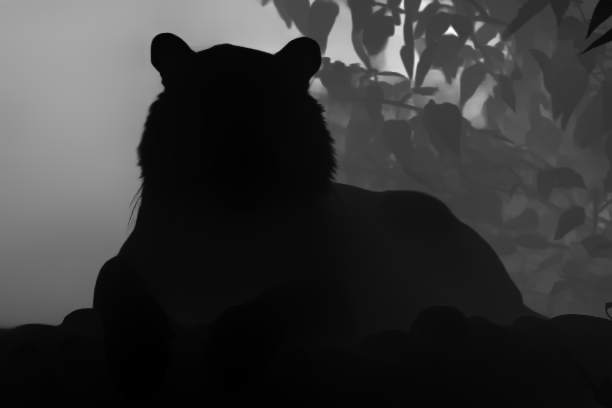

In [ ]:
depth

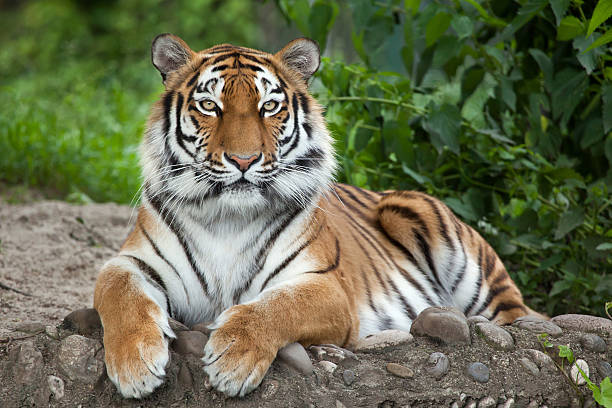

In [ ]:
image

In [ ]:
post_processed_output

[{'predicted_depth': tensor([[28.1749, 28.3581, 28.1384,  ...,  8.6313,  8.7482,  9.0283],
          [28.0487, 28.0397, 28.0299,  ...,  8.4426,  8.4981,  8.5453],
          [27.9898, 28.0024, 27.9813,  ...,  8.3794,  8.4258,  8.4862],
          ...,
          [ 7.5584,  7.5302,  7.5190,  ...,  7.9702,  7.9689,  7.9747],
          [ 7.5592,  7.5371,  7.5310,  ...,  7.9665,  7.9623,  7.9642],
          [ 7.5852,  7.5391,  7.5402,  ...,  7.9461,  7.9674,  8.0634]],
         device='cuda:0'),
  'field_of_view': tensor(4.3767, device='cuda:0'),
  'focal_length': tensor(8007.8994, device='cuda:0')}]

In [ ]:
cow_image = Image.open("/content/00096-S .jpeg")

# image_processor = DepthProImageProcessorFast.from_pretrained("apple/DepthPro-hf")
# model = DepthProForDepthEstimation.from_pretrained("apple/DepthPro-hf").to(device)

inputs = image_processor(images=cow_image, return_tensors="pt").to(device)

with torch.no_grad():
    outputs = model(**inputs)

post_processed_output = image_processor.post_process_depth_estimation(
    outputs, target_sizes=[(image.height, image.width)],
)

field_of_view = post_processed_output[0]["field_of_view"]
focal_length = post_processed_output[0]["focal_length"]
depth = post_processed_output[0]["predicted_depth"]
depth = (depth - depth.min()) / (depth.max() - depth.min())
depth = depth * 255.
depth = depth.detach().cpu().numpy()
depth = Image.fromarray(depth.astype("uint8"))

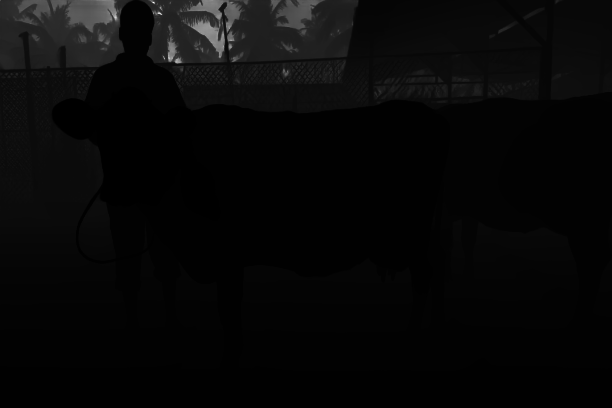

In [ ]:
depth

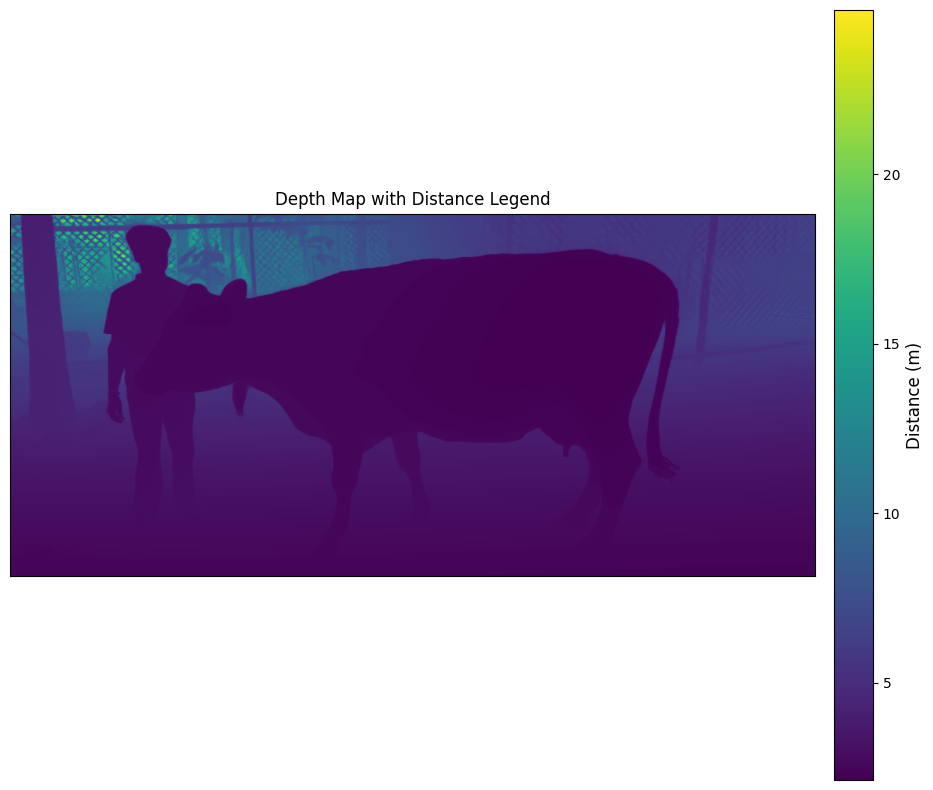

In [13]:
import requests
from PIL import Image
import torch
from transformers import DepthProImageProcessorFast, DepthProForDepthEstimation
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image = Image.open("/content/9493-S .jpeg").convert("RGB")
processor = DepthProImageProcessorFast.from_pretrained("apple/DepthPro-hf")
model     = DepthProForDepthEstimation.from_pretrained("apple/DepthPro-hf").to(device)
inputs = processor(images=image, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)
post = processor.post_process_depth_estimation(
    outputs,
    target_sizes=[(image.height, image.width)]
)[0]
depth_map = post["predicted_depth"].squeeze().cpu().numpy()  # shape: H×W
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(
    depth_map,
    cmap="viridis",
    vmin=depth_map.min(),
    vmax=depth_map.max()

)

cbar = fig.colorbar(
    cax,
    ax=ax,
    orientation="vertical",
    pad=0.02
)
cbar.set_label("Distance (m)", size=12)

ax.set_xticks([])
ax.set_yticks([])
plt.title("Depth Map with Distance Legend")
plt.tight_layout()
plt.show()

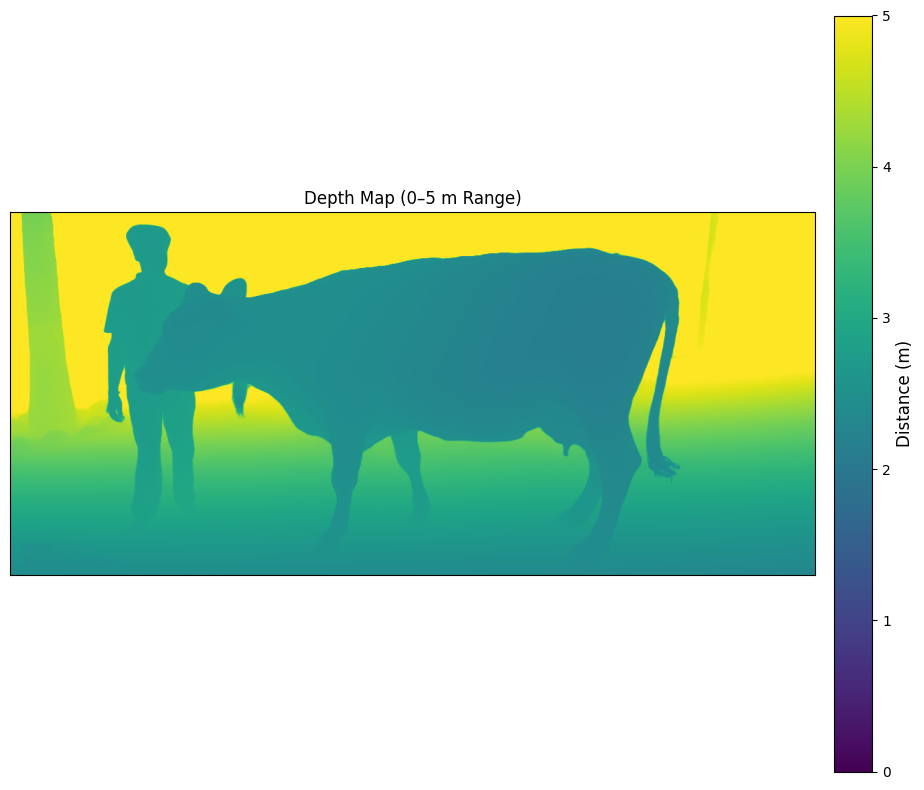

In [14]:
clipped = np.clip(depth_map, 0, 5)  # values <0 → 0, >5 → 5
# Alternatively, if you’d rather hide out-of-range pixels entirely:
# clipped = np.ma.masked_outside(depth_map, 0, 5)

# 7) Visualize clipped depth map with colorbar from 0 to 5 m
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(
    clipped,
    cmap="viridis",
    vmin=0,
    vmax=5
)

cbar = fig.colorbar(
    cax,
    ax=ax,
    orientation="vertical",
    pad=0.02
)
cbar.set_label("Distance (m)", size=12)
cbar.set_ticks(np.linspace(0, 5, 6))  # ticks at every meter

ax.set_xticks([])
ax.set_yticks([])
plt.title("Depth Map (0–5 m Range)")
plt.tight_layout()
plt.show()

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling


image 1/1 /content/2m.jpeg: 640x480 3 persons, 1 backpack, 1 bed, 1 tv, 1 clock, 11.0ms
Speed: 2.8ms preprocess, 11.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)


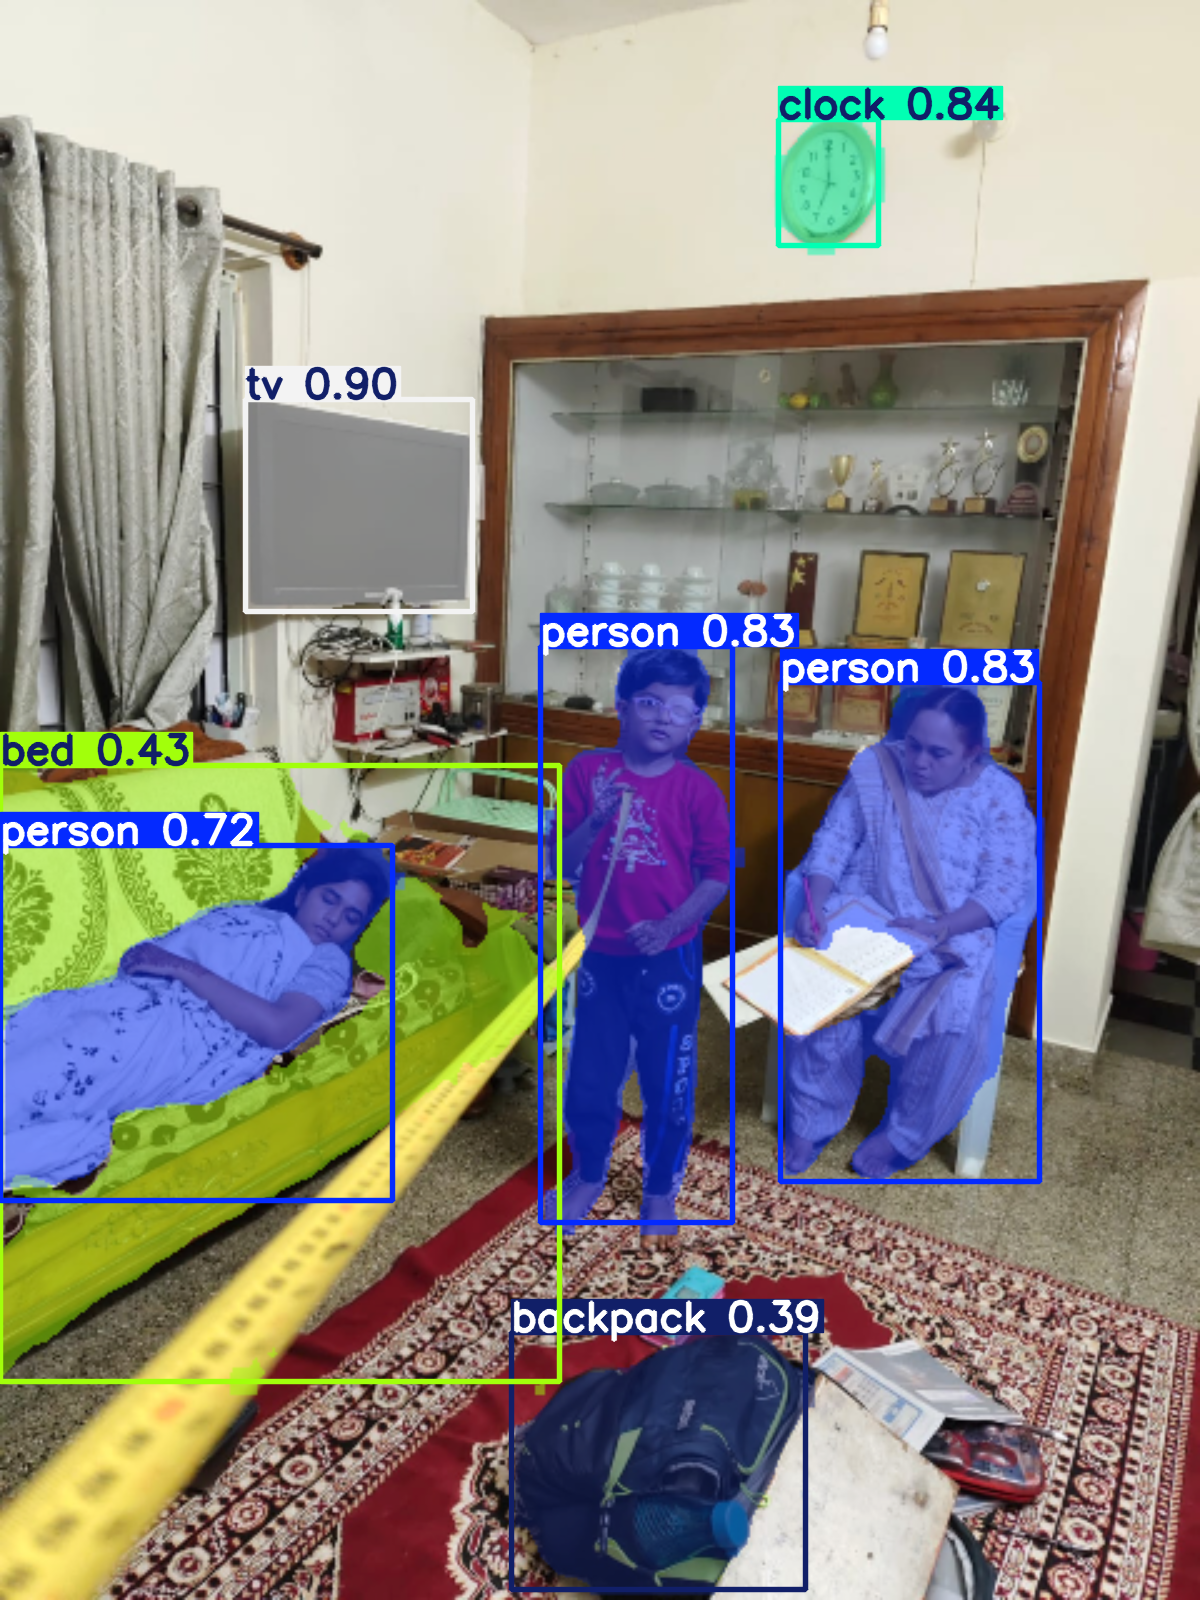

In [20]:
from ultralytics import YOLO
model = model = YOLO("yolo11n-seg.pt")
results = model("/content/2m.jpeg")  # predict on an image

# Access the results
for result in results:
    xy = result.masks.xy  # mask in polygon format
    xyn = result.masks.xyn  # normalized
    masks = result.masks.data  # mask in matrix format (num_objects x H x W)
    result.show()


image 1/1 /content/2m.jpeg: 640x480 3 persons, 1 backpack, 1 bed, 1 tv, 1 clock, 11.9ms
Speed: 11.0ms preprocess, 11.9ms inference, 11.8ms postprocess per image at shape (1, 3, 640, 480)
Person 3: median distance = 2.64 m
Person 4: median distance = 2.34 m
Person 5: median distance = 2.17 m


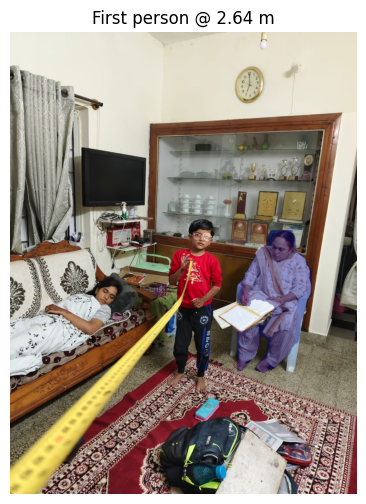

In [22]:
import numpy as np
import torch
from PIL import Image
import cv2
from transformers import DepthProImageProcessorFast, DepthProForDepthEstimation
from ultralytics import YOLO
import matplotlib.pyplot as plt

# ---------------------------
# 1) Setup
# ---------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_path = "/content/2m.jpeg"

# ---------------------------
# 2) Load the RGB image
# ---------------------------
image = Image.open(img_path).convert("RGB")
W, H = image.size  # W = width, H = height

# ---------------------------
# 3) Run DepthPro to get a depth map (in meters)
# ---------------------------
processor = DepthProImageProcessorFast.from_pretrained("apple/DepthPro-hf")
model_depth = DepthProForDepthEstimation.from_pretrained("apple/DepthPro-hf").to(device)

inputs = processor(images=image, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model_depth(**inputs)

# post‐process back to original image size
post = processor.post_process_depth_estimation(
    outputs,
    target_sizes=[(H, W)]
)[0]
depth_map = post["predicted_depth"].squeeze().cpu().numpy()
# depth_map[y, x] now holds the distance (in meters)

# ---------------------------
# 4) Run YOLOv11-seg for person segmentation
# ---------------------------
model_seg = YOLO("yolo11n-seg.pt")
results = model_seg(img_path)  # returns a list of Result objects

# ---------------------------
# 5) For each detected person, resize mask → extract depths → summarize
# ---------------------------
for result in results:
    cls_ids = result.boxes.cls.cpu().numpy().astype(int)
    confs   = result.boxes.conf.cpu().numpy()
    masks   = result.masks.data.cpu().numpy()  # shape (N, H_seg, W_seg)

    for idx, (cls_id, conf, mask) in enumerate(zip(cls_ids, confs, masks), start=1):
        # COCO class 0 = “person”
        if cls_id == 0 and conf > 0.5:
            # 5.1) Upsample mask to match depth_map resolution
            mask_uint8 = (mask.astype(np.uint8) * 255)
            mask_rs    = cv2.resize(
                mask_uint8,
                (W, H),
                interpolation=cv2.INTER_NEAREST
            )
            mask_bool = mask_rs.astype(bool)

            # 5.2) Extract depth values under the person mask
            depths = depth_map[mask_bool]
            depths = depths[np.isfinite(depths)]
            # optional: limit to plausible human distances
            depths = depths[(depths > 0.3) & (depths < 20)]

            # 5.3) Summarize
            if depths.size > 0:
                dist_m = float(np.median(depths))
                print(f"Person {idx}: median distance = {dist_m:.2f} m")
            else:
                print(f"Person {idx}: no valid depth samples")

# ---------------------------
# 6) (Optional) Visualize first person mask + depth overlay
# ---------------------------
if results and len(depth_map.shape) == 2:
    # find first person mask again
    for result in results:
        cls_ids = result.boxes.cls.cpu().numpy().astype(int)
        masks   = result.masks.data.cpu().numpy()
        # pick the first person
        if 0 in cls_ids:
            i = int(np.where(cls_ids == 0)[0][0])
            mask0_uint8 = (masks[i].astype(np.uint8) * 255)
            mask0_rs    = cv2.resize(mask0_uint8, (W, H),
                                     interpolation=cv2.INTER_NEAREST)
            fig, ax = plt.subplots(figsize=(8,6))
            ax.imshow(image)
            ax.imshow(np.ma.masked_where(mask0_rs == 0, mask0_rs),
                      cmap="jet", alpha=0.4)
            ax.set_title(f"First person @ {float(np.median(depth_map[mask0_rs.astype(bool)])):.2f} m")
            ax.axis("off")
            plt.show()
            break


image 1/1 /content/9493-S .jpeg: 288x640 1 cattle, 78.9ms
Speed: 35.9ms preprocess, 78.9ms inference, 127.4ms postprocess per image at shape (1, 3, 288, 640)


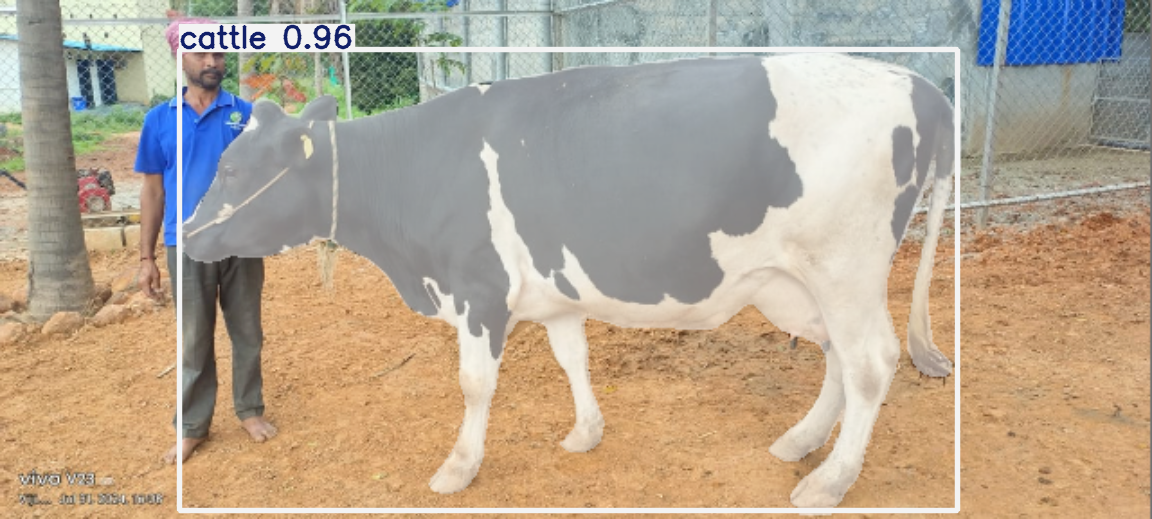

In [12]:
from ultralytics import YOLO
model = YOLO("/content/side_segmentation_model.pt")
results = model("/content/9493-S .jpeg")
for result in results:
  result.show()


image 1/1 /content/9707-S .jpeg: 288x640 1 cattle, 8.4ms
Speed: 3.9ms preprocess, 8.4ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 640)
Cow #1 (conf 0.96): ~2.20 m away


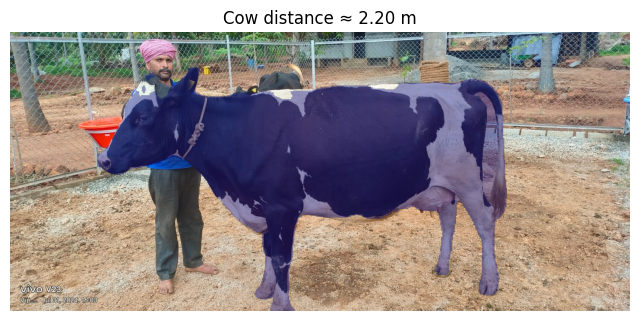

SystemExit: 

In [18]:
import numpy as np
import torch
from PIL import Image
import cv2
from transformers import DepthProImageProcessorFast, DepthProForDepthEstimation
from ultralytics import YOLO

# ---------------------------
# 1) Setup
# ---------------------------
device  = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_path = "/content/9707-S .jpeg"                # your input image
cow_model_path = "/content/side_segmentation_model.pt"  # your custom YOLO seg model

# ---------------------------
# 2) Load RGB image & sizes
# ---------------------------
image = Image.open(img_path).convert("RGB")
W, H   = image.size  # width, height

# ---------------------------
# 3) Compute depth map via DepthPro
# ---------------------------
processor   = DepthProImageProcessorFast.from_pretrained("apple/DepthPro-hf")
model_depth = DepthProForDepthEstimation.from_pretrained("apple/DepthPro-hf").to(device)

inputs = processor(images=image, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model_depth(**inputs)

post = processor.post_process_depth_estimation(
    outputs,
    target_sizes=[(H, W)]
)[0]
depth_map = post["predicted_depth"].squeeze().cpu().numpy()
# now depth_map[y,x] is the distance in meters

# ---------------------------
# 4) Run your custom cow-segmentation model
# ---------------------------
model_cow = YOLO(cow_model_path)
results   = model_cow(img_path)  # list of Result objects
cow_names = model_cow.names      # mapping from class_id → class_name

# ---------------------------
# 5) For each detected cow: upsample mask → extract depths → summarize
# ---------------------------
for result in results:
    cls_ids = result.boxes.cls.cpu().numpy().astype(int)
    confs   = result.boxes.conf.cpu().numpy()
    masks   = result.masks.data.cpu().numpy()  # shape (N, H_seg, W_seg)

    for idx, (cls_id, conf, mask) in enumerate(zip(cls_ids, confs, masks), start=1):
        name = cow_names.get(cls_id, str(cls_id))
        # adjust this string to match your cow class label
        if name.lower() in ("cow", "cattle") and conf > 0.5:
            # 5.1) Upsample mask to original size
            mask_u8 = (mask.astype(np.uint8) * 255)
            mask_rs = cv2.resize(
                mask_u8,
                (W, H),
                interpolation=cv2.INTER_NEAREST
            )
            mask_bool = mask_rs.astype(bool)

            # 5.2) Extract depth pixels under mask
            depths = depth_map[mask_bool]
            depths = depths[np.isfinite(depths)]
            # optional: only keep plausible cow‐distances
            depths = depths[(depths > 0.2) & (depths < 20)]

            # 5.3) Summarize
            if depths.size:
                dist_m = float(np.median(depths))
                print(f"Cow #{idx} (conf {conf:.2f}): ~{dist_m:.2f} m away")
            else:
                print(f"Cow #{idx}: no valid depth samples")

# ---------------------------
# 6) (Optional) Visualize first cow overlay
# ---------------------------
if results:
    for result in results:
        cls_ids = result.boxes.cls.cpu().numpy().astype(int)
        masks   = result.masks.data.cpu().numpy()
        for i, cls_id in enumerate(cls_ids):
            if cow_names.get(cls_id, "").lower() in ("cow","cattle"):
                # take this mask
                mask0 = masks[i].astype(np.uint8)*255
                mask0 = cv2.resize(mask0, (W, H), interpolation=cv2.INTER_NEAREST)
                fig, ax = plt.subplots(figsize=(8,6))
                ax.imshow(image)
                ax.imshow(np.ma.masked_where(mask0==0, mask0),
                          cmap="jet", alpha=0.4)
                sample_depths = depth_map[mask0.astype(bool)]
                sample_depths = sample_depths[np.isfinite(sample_depths)]
                med = float(np.median(sample_depths)) if sample_depths.size else -1
                ax.set_title(f"Cow distance ≈ {med:.2f} m")
                ax.axis("off")
                plt.show()
                raise SystemExit  # only show first


image 1/1 /content/2m.jpeg: 640x480 3 persons, 1 backpack, 1 bed, 1 tv, 1 clock, 10.4ms
Speed: 2.8ms preprocess, 10.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)
Person 3 (conf 0.83): 2.64 m
Person 4 (conf 0.83): 2.34 m
Person 5 (conf 0.72): 2.17 m


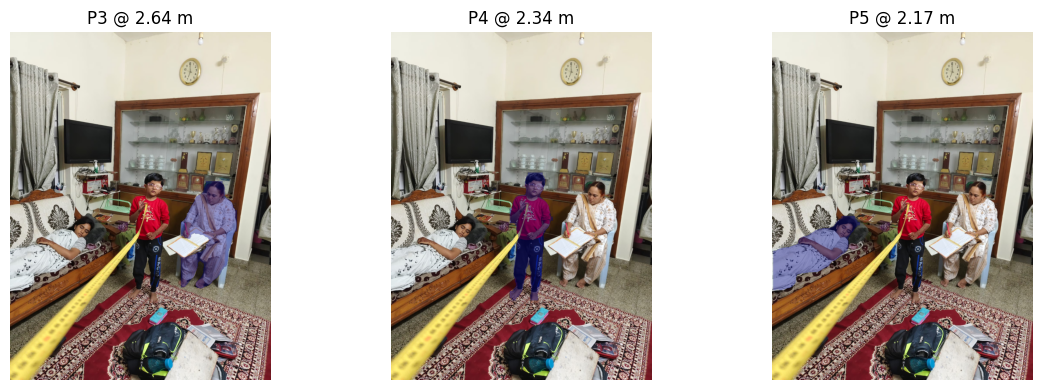

In [23]:
import numpy as np
import torch
from PIL import Image
import cv2
from transformers import DepthProImageProcessorFast, DepthProForDepthEstimation
from ultralytics import YOLO
import matplotlib.pyplot as plt

device   = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_path = "/content/2m.jpeg"


image = Image.open(img_path).convert("RGB")
W, H   = image.size

-
processor   = DepthProImageProcessorFast.from_pretrained("apple/DepthPro-hf")
model_depth = DepthProForDepthEstimation.from_pretrained("apple/DepthPro-hf").to(device)

inputs = processor(images=image, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model_depth(**inputs)

post      = processor.post_process_depth_estimation(outputs, target_sizes=[(H, W)])[0]
depth_map = post["predicted_depth"].squeeze().cpu().numpy()


model_seg = YOLO("yolo11n-seg.pt")
results   = model_seg(img_path)


people = []

for result in results:
    cls_ids = result.boxes.cls.cpu().numpy().astype(int)
    confs   = result.boxes.conf.cpu().numpy()
    masks   = result.masks.data.cpu().numpy()  # shape (N, H_det, W_det)

    for idx, (cls_id, conf, mask) in enumerate(zip(cls_ids, confs, masks), start=1):
        if cls_id == 0 and conf > 0.5:  # class 0 = person
            # upsample mask to original image size
            mask_u8 = (mask.astype(np.uint8) * 255)
            mask_rs = cv2.resize(mask_u8, (W, H), interpolation=cv2.INTER_NEAREST)
            mask_bool = mask_rs.astype(bool)

            # extract valid depths under mask
            depths = depth_map[mask_bool]
            depths = depths[np.isfinite(depths)]
            depths = depths[(depths > 0.3) & (depths < 20)]

            if depths.size:
                dist_m = float(np.median(depths))
            else:
                dist_m = None

            people.append({
                'idx':   idx,
                'conf':  conf,
                'mask':  mask_bool,
                'dist':  dist_m
            })

            if dist_m is not None:
                print(f"Person {idx} (conf {conf:.2f}): {dist_m:.2f} m")
            else:
                print(f"Person {idx} (conf {conf:.2f}): no valid depth")


n = len(people)
if n:
    # create one subplot per person
    cols = min(4, n)
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
    axes = np.array(axes).reshape(-1)  # flatten

    for ax, p in zip(axes, people):
        ax.imshow(image)
        # overlay mask
        ax.imshow(np.ma.masked_where(~p['mask'], p['mask']), cmap="jet", alpha=0.4)
        title = f"P{p['idx']} @ {p['dist']:.2f} m" if p['dist'] is not None else f"P{p['idx']} @ N/A"
        ax.set_title(title)
        ax.axis("off")

    # hide any extra axes
    for ax in axes[n:]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()
else:
    print("No persons detected.")